# AWS Networking Fundamentals

## Defining an AWS Region

A Region is a geographic area where AWS has deployed physical infrastructure and data centers. These data centers are arranged into logical groupings called Availability Zones. Each AWS Region consists of multiple Availability Zones. Each Availability Zone is isolated and physically separate from the others, but they are connected by high-bandwidth, low-latency connections. The multiple Availability Zone design within every AWS Region offers you great advantages for reliability and durability. 

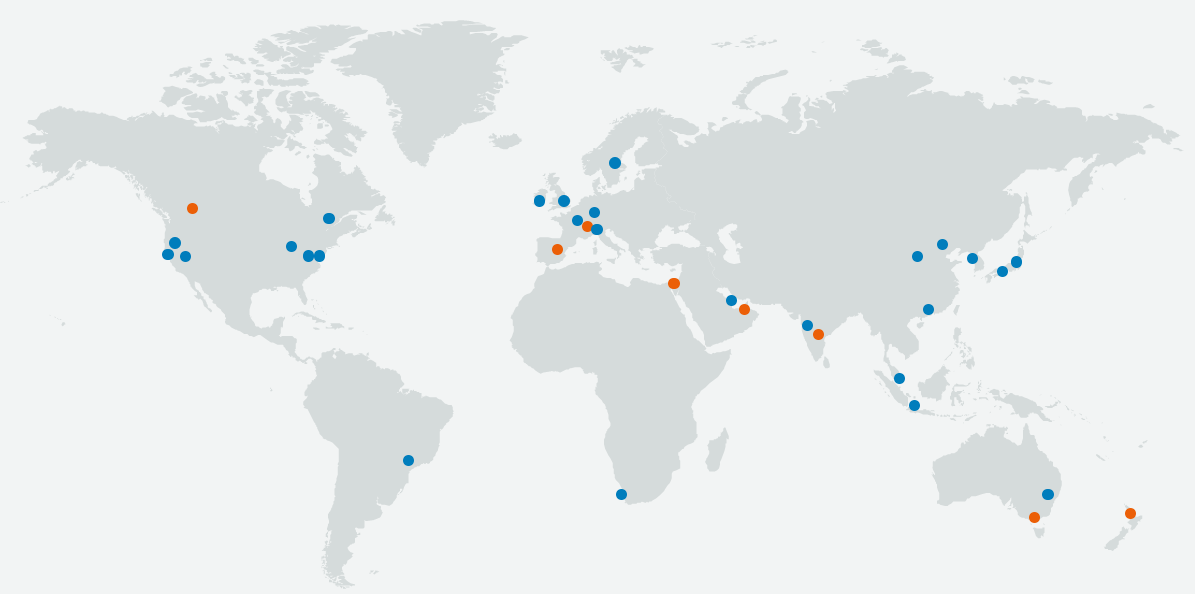

You choose which Region you want to run your applications in. Each Region is isolated from the other Regions, meaning that no data goes in or out of your environment in your chosen Region without you explicitly granting permission for that data to move.

For example, perhaps you have compliance requirements that dictate that any financial information in Frankfurt, Germany cannot leave Germany. Data stored in a Region never leaves that Region. So if you use the Frankfurt Region for your data, that data stays in the Frankfurt Region, unless you explicitly—with the right credentials and permissions—request the data be exported, moved, or copied. Regional data sovereignty is part of the critical design of AWS Regions, with data being subject to the local laws and statutes of the country where the Region lives.

## Selecting a Region

When determining the right Region for your services, data, and applications, consider the following four business factors. 

### Compliance with data governance and legal requirements
–
Depending on your company and location, you might need to run your data out of specific areas. For example, if your company requires all of its data to reside within the boundaries of the UK, you would choose the London Region. 



Not all companies have location-specific data regulations, so you might need to focus more on the other three factors.

### Proximity to your customers
–
Selecting a Region that is close to the majority of your customers will reduce latency and allow faster content delivery. 



For example, your company is based in Boston, MA and many of your customers live in Singapore. You might decide to run your infrastructure in the Northern Virginia Region (US-East) to be close to company headquarters, and then run your customer applications from the Singapore Region.

### Available services within a Region
–
Sometimes, the closest Region might not have all the features that you want to offer to customers. AWS is frequently innovating by creating new services and expanding on features within existing services. However, making new services available around the world sometimes requires AWS to build physical hardware one Region at a time. 



Suppose that your developers want to build an application that uses Amazon Braket (AWS quantum computing platform). As of this course, Braket is not yet available in every AWS Region around the world. So your developers would have to run it in one of the Regions that already offers it.

### Pricing per Region
–
If you run the same workload in two Regions, for example United States and Brazil, you might notice that the same workload with the same run times costs more in Brazil than in the Oregon Region. Although several factors determine pricing, one factor is the variety of different tax structures established in countries around the globe.  



If you plan to run services in multiple Regions, make sure to check the cost of the services in those Regions. Select this link for more information on Amazon EC2 Pricing(opens in a new tab).

## Availability Zones

An Availability Zone is a group of data centers within a Region. Availability Zones are located tens of miles apart from each other. This distance allows the Availability Zones to have very low latency (the time between when content is requested and received) between them. However, if a disaster occurs in one part of the Region, they are distant enough to reduce the chance that multiple Availability Zones are affected.

Each Availability Zone has independent power, cooling, and physical security. If your applications require high availability, you can design your applications to run in multiple Availability Zones to achieve even greater fault tolerance.  

When you launch an EC2 instance, it launches a virtual machine on physical hardware that is sitting within one or more data centers that comprise an Availability Zone. 

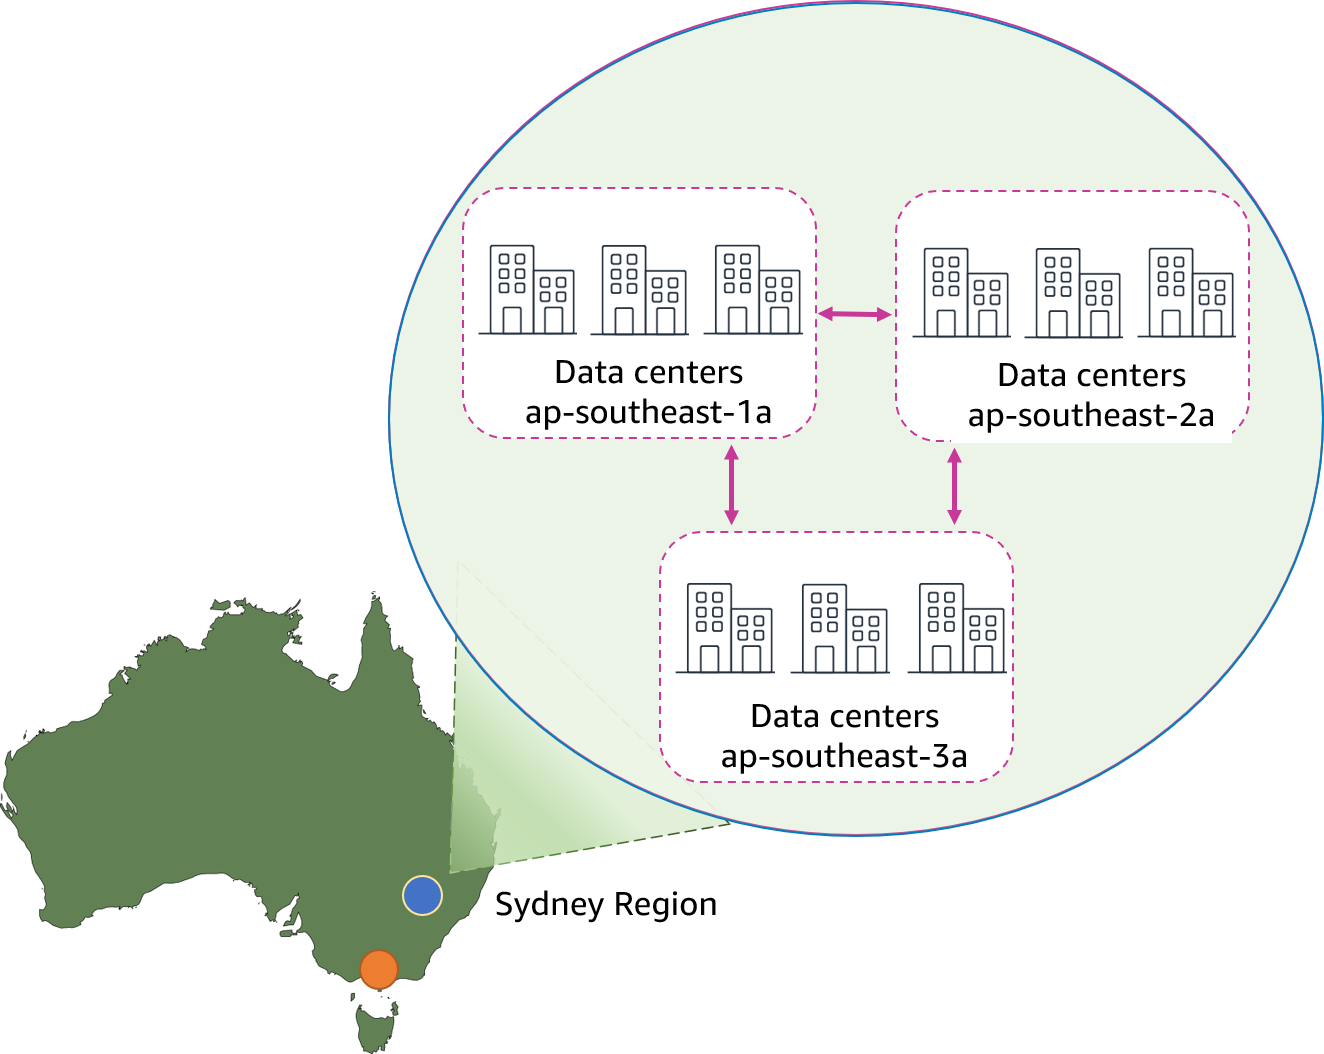

In an AWS architecture diagram, the Availability Zones are nested within a Region, then surrounded by the AWS Cloud. Some AWS services, such as Amazon Relational Database Service (Amazon RDS), will automatically replicate copies across multiple Availability Zones for fault tolerance and redundancy. When you create an EC2 instance, it does not automatically replicate copies across the Availability Zones by default. However, you can create separate instances in each Availability Zone so that, in the event that one instance fails, your application can be designed to have an instance in another Availability Zone handle user requests.

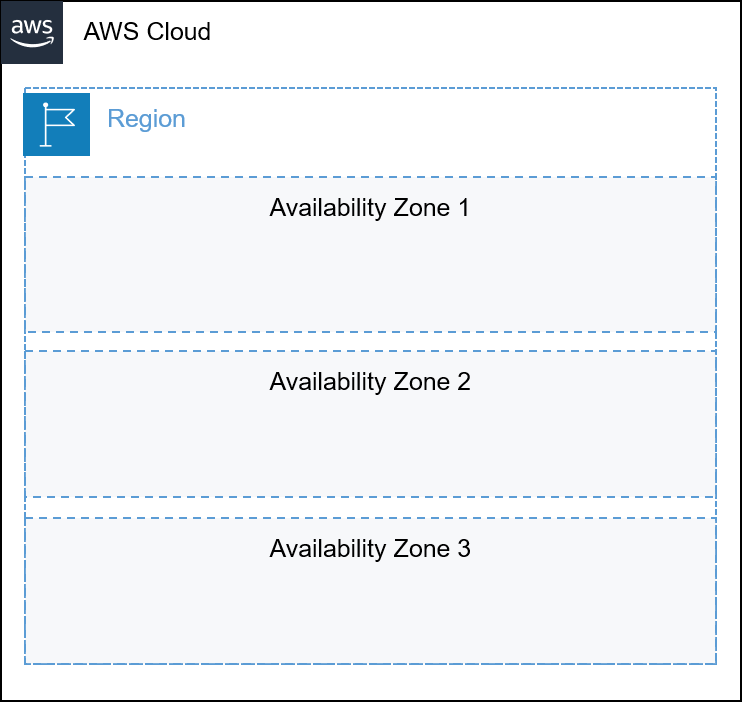

## Virtual private cloud

A virtual private cloud (VPC)(opens in a new tab) is a private virtual network dedicated to your AWS account. Remember, virtual means that the configuration is software based and does not map directly to physical infrastructure. Each VPC is logically isolated from other virtual networks in the AWS Cloud. 

John is having a difficult time visualizing the concept of a VPC and reaches out to Sofía. Sofía explains a VPC like this: 

Imagine a big, rectangular apartment building. The whole building has the same internet provider but each apartment is its own separate network. The people in John's apartment can run whatever connected devices they want to run within their private network without interfering with their neighbor's network. Each apartment has a device (gateway) to allow access into and out of their private network. They each have firewalls and security rules where they determine who is allowed or denied access to their network. 

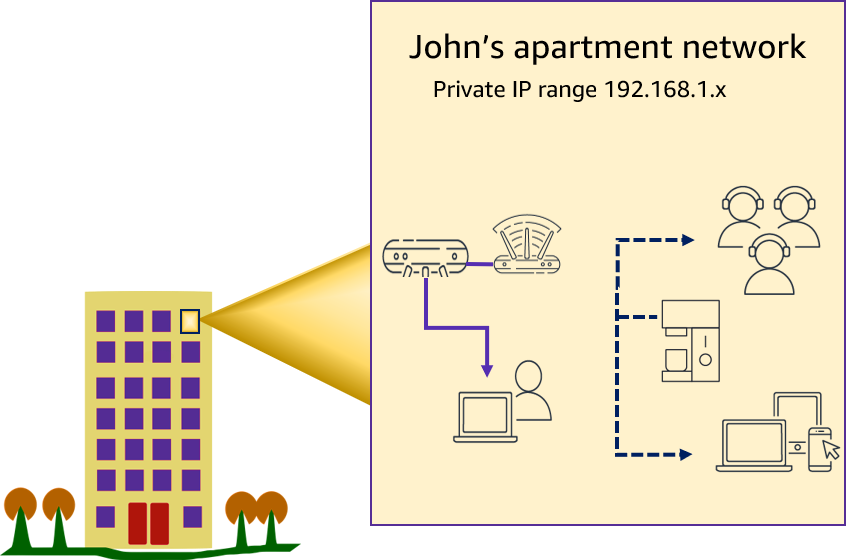

A tall rectangular apartment building highlighting John's apartment. There is an internet gateway (router) that connects to a wireless router where all of John's devices securely connect. One desktop computer is connected to the router with a physical network cable.

A VPC is also a private network. Inside of the private network are subnets where you would launch your AWS resources, such as EC2 instances. For access to the internet, you can add an internet gateway to your VPC. You have complete control of the traffic routing (how traffic enters and exits your VPC), the security, and the services you choose to run. Nothing that you do within your VPC has any effect on a VPC in another user's account.

At first, John finds it difficult to understand or visualize a VPC, but after Sofía explains it, all of the pieces suddenly make sense. John thanks Sofía for her guidance and goes back into his studies of how to use a VPC.

## VPC types

There are two types of VPCs in AWS, a default and a nondefault. You can only have one default VPC per Region. Any additional VPCs you create are isolated and private unless you explicitly grant public access. 

When you first create your AWS account, a default VPC is created in each AWS Region. A default VPC comes with a public subnet in each Availability Zone, an internet gateway, and settings for Domain Name System (DNS) resolution. Therefore, you can immediately start launching EC2 instances into a default VPC. You can also use services such as Elastic Load Balancing (ELB), Amazon Relational Database Service (RDS), and Amazon Elastic MapReduce (EMR) in your default VPC.

A default VPC is great for getting started quickly and for launching public instances such as a blog or simple website. You can modify the components and subnets in your default VPC as needed.

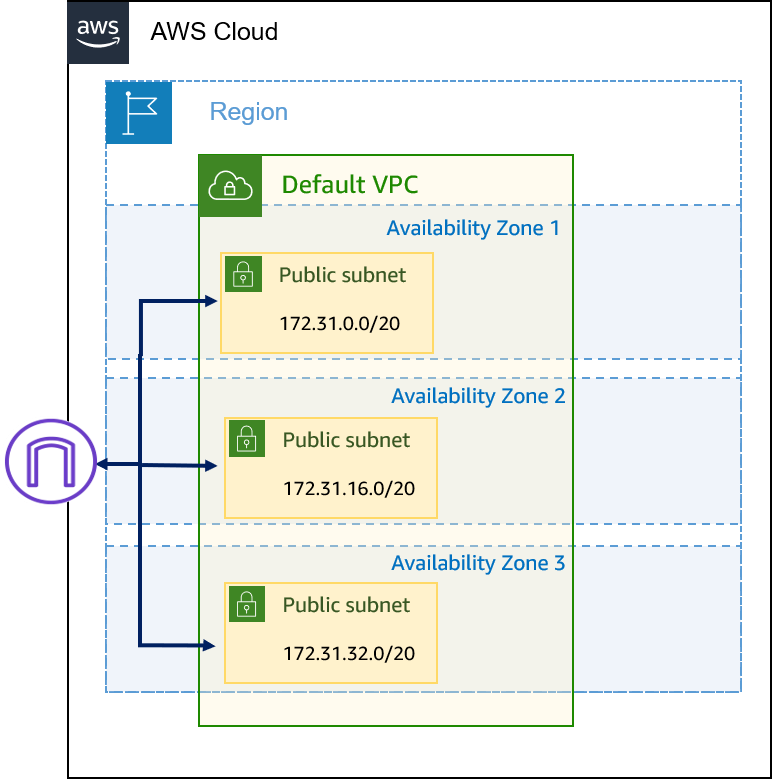

An internet gateway connects to subnets with the default VPC. EC2 instances would be deployed within one or more subnets. Additional components for security and routing would be added, but the VPC as a whole is private for just this AWS account.

Nondefault VPCs(opens in a new tab) are also a regional service. They are additional VPCs that you create within your AWS account. They are isolated by default so nothing is allowed in or out without your explicit configuration. 

Nondefault VPCs have a choice for default or dedicated tenancy. Default tenancy is any resource provisioned inside your VPC on shared hardware. As mentioned in a previous lesson, dedicated tenancy has hardware that is dedicated specifically to your account.

## AWS networking

John admires the flexibility of how AWS has designed its networking and security. Compared to the networking of a physical data center, the AWS Cloud has some slight differences in security and the terminology of the AWS services that provide routing. Overall, he has a firm grasp of TCP/IP and routing, and enjoys reading about these topics. He takes a moment out of his day to reread the sections on TCP/IP subnetting and Classless Inter-Domain Routing (CIDR) notation. To review the topics that John is studying, expand each of the following six categories.

### Subnets
–
A subnet, or subnetwork, is a smaller network inside of a larger network. 



A subnet consists of a smaller portion of your IP address range. Subnets are how you add structure and functionality to your VPCs. Subnets make networks more efficient because network traffic can travel shorter distances without passing through unnecessary routers to reach its destination.


Each subnet must reside entirely within one Availability Zone and cannot span zones. By launching instances in separate Availability Zones, you can protect your applications from the failure of a single zone. You use a public subnet for resources that must be connected to the internet and a private subnet for resources that won't be connected to the internet.



A subnet in AWS is a smaller range of IP addresses taken from the larger VPC CIDR block. 



By default, Amazon Virtual Private Cloud (Amazon VPC) uses the IPv4 addressing protocol; you can't turn off this behavior. When you create a VPC, you must specify an IPv4 CIDR block (a range of private IPv4 addresses). You can optionally assign an IPv6 CIDR block to your VPC and assign IPv6 addresses from that block to instances in your subnets.

### Subnetting (subnet masks)
–
Subnetting is the process of dividing a network into smaller network sections. Subnetting is done by borrowing bits from the host portion of the IP address.



This is done with the use of a subnet mask. A subnet mask is a 32-bit address that helps separate the network address from host address. When you see /24 or /16 in an IP address, you know that the first 24 bits or the first 16 bits are the network.



For example, in an IP address written like this: 10.0.1.4/24, the network is 10.0.1.x and the .4 is the host. The subnet mask /24 (slash 24) tells us that the first 24 bits of the address are for the network. Written out, the subnet mask looks like 255.255.255.0 with 8 bits for each of the first three sections being represented as 1s (8 bits times 3 sections: 8 x 3 = 24. 24 bits). Written out, it would look like 11111111.11111111.11111111.0.



An IP address of 10.0.1.4/16 means the following:

10.0 is the network portion.
.1.4 is the host portion.
The subnet mask is /16 and looks like 255.255.0.0.
Written out it is 11111111.1111111.0.0.
An IP address of 10.0.1.4/26 means the following:

10.0.1 is the network portion.
.4 (or any number between .1 and .64) is the host portion.
The subnet mask is /26 and looks like 255.255.255.192.
Written out it is 11111111.1111111.11111111.11000000.

### CIDR blocks
–
(opens in a new tab)A CIDR block is a range of IP addresses. The IP addresses in the block are sequential (for example 1.1.1.1, 1.1.1.2, 1.1.1.3).



The allowed block size is between a /28 netmask and /16 netmask. 
If you create more than one subnet in a VPC, the CIDR blocks of the subnets cannot overlap. 
For example, if you create a VPC with CIDR block 10.0.0.0/24, it supports 256 IP addresses. You can break this CIDR block into two subnets, each supporting 128 IP addresses. 
One subnet uses CIDR block 10.0.0.0/25 (for addresses 10.0.0.0–10.0.0.127).
The other uses CIDR block 10.0.0.128/25 (for addresses 10.0.0.128–10.0.0.255).

### Five reserved IPs
–
There are five reserved addresses inside each subnet that are reserved for the use of AWS resources.

The network address: x.x.x.0 (for example, the last .0 in 10.0.0.0) 
The first IP address after the network address: x.x.x.1 (for example the .1 in 10.0.0.1)
AWS uses this address for the Amazon VPC router.
The second IP address after the network address (for example, the .2 in 10.0.0.2)
AWS uses this IP address for DNS 10.0.0.2.
The third address (for example, the .3 in 10.0.0.3)
This address is reserved in case it is needed in the future.
The last address we cannot use: the broadcast address, which is the last IP in our subnet (for example, the .255 in 10.0.0.255)
AWS does not support broadcast in a VPC.
If you have a subnet range /28, which contains 16 total IP addresses, only 11 IP addresses can be used for your resources due to these five reserved addresses. When determining you subnet ranges, always take into consideration these five reserved addresses.

### Network access control lists
–
A network access control list (network ACL)(opens in a new tab) is a type of security filter, like a firewall, that can filter traffic as it enters and leaves a subnet. 

Network ACLs are attached at the subnet level. 
When your default VPC is created, a default network ACL is created and associated with all subnets. By default, it allows all inbound and outbound IPv4 traffic and, if applicable, IPv6 traffic.
You can create a custom network ACL and associate it with a subnet. By default, each custom network ACL denies all inbound and outbound traffic until you add rules.
Each subnet in your VPC must be associated with a network ACL. If you don't explicitly associate a subnet with a network ACL, the subnet is automatically associated with the default network ACL.

Network ACLs are used for traffic entering or leaving a subnet, and only manage traffic that is crossing the subnet boundary. If you have two EC2 instances in the same subnet, the network ACLs are not used because the communication between the two instances is not crossing the subnet boundary. 
Network ACLs are stateless, which means that they don't remember the routes that traffic took to come into your network and won't automatically send it back the same way. They won't do this by default. If you allow an inbound rule, you must also allow an outbound rule. Your network ACL must explicitly state that traffic that was allowed inbound is also allowed out. Network ACLs see the traffic between client and server as two different streams, so you must have two rules, one rule for each stream. 
Network ACL rules are processed in order from lowest rule number to the highest rule number. When a rule is matched, an action is taken, and processing stops. No other rules are evaluated after a match is found. Network ACLs have allow rules or deny rules, and can explicitly allow or deny specific IP addresses.

### Security groups
–
Security groups(opens in a new tab) are another security feature of AWS. Unlike network ACLs that are attached to the subnet, security groups are attached to the elastic network interface of the AWS resources within the subnet. That means the security groups would be at the boundary of the EC2 instance instead of at the subnet boundary like a network ACL. 
Security groups are stateful, and have inbound and outbound rules. Stateful firewalls view traffic as one stream. If traffic is allowed in, that traffic is automatically allowed back out. Security groups recognize other AWS resources. 
For example, to communicate to another EC2 instance, you could add the instance ID for that instance to allow traffic from that instance.
Security groups also allow rules to be added for other security groups, or add a rule for the security group itself. 
Security groups have a hidden explicit deny. This means that anything that is not explicitly allowed is denied.

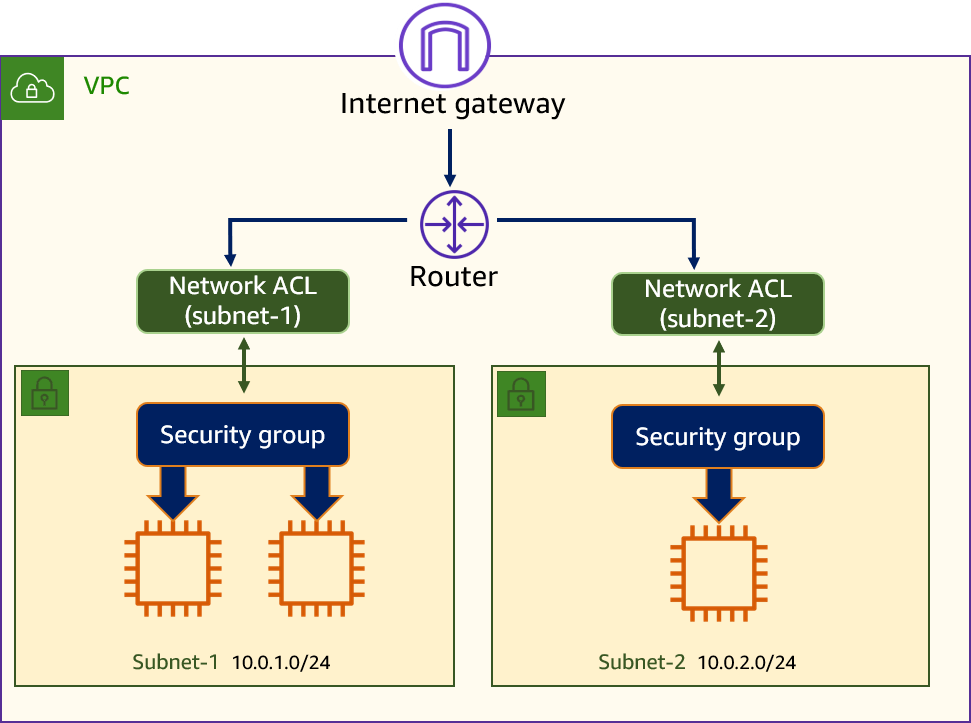

## End of the day

John is finishing his notes on AWS networking as Sofía arrives with a list of questions to test his knowledge. Take a moment to see how many questions you can answer. Good luck!